# Paso 1: Importar bibliotecas y cargar el dataset

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
columns = ['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'xege', 'xegvy', 'yege', 'yegvx']
df = pd.read_csv(url, header=None, names=columns)

# Paso 2: Función para escalar características a píxeles
Las características `xbox, ybox, width`, y `height` están escaladas de 0-15. Las convertimos a coordenadas de píxeles (0-19) en una imagen de 20x20:

In [5]:
def scale_box_feature(value):
    return int(round(value * 19 / 15))  # Escalar a 0-19

# Paso 3: Función para reconstruir la imagen

In [8]:
def reconstruct_letter(sample):
    # Escalar características del bounding box
    left = scale_box_feature(sample['xbox'])
    top = scale_box_feature(sample['ybox'])
    scaled_width = scale_box_feature(sample['width'])
    scaled_height = scale_box_feature(sample['height'])

    right = left + scaled_width
    bottom = top + scaled_height

    image = np.zeros((20, 20))

    bb_area = scaled_width * scaled_height
    actual_onpix = sample['onpix'] * 25

    if bb_area > 0 and actual_onpix > 0:
        fill_pixels = min(actual_onpix, bb_area)
        mask = np.zeros((scaled_height, scaled_width))

        np.random.seed(42)
        indices = np.random.choice(bb_area, fill_pixels, replace=False)
        rows, cols = np.unravel_index(indices, (scaled_height, scaled_width))
        mask[rows, cols] = 1

        image[top:bottom, left:right] = mask

    # Retornar imagen + parámetros del bounding box
    return image, left, top, scaled_width, scaled_height

# Paso 4: Visualizar una letra reconstruida

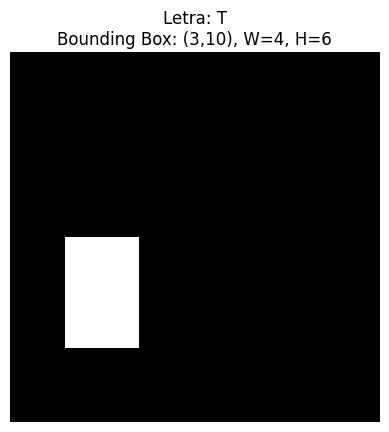

In [9]:
# Obtener imagen y parámetros
sample = df.iloc[0]
image, left, top, scaled_width, scaled_height = reconstruct_letter(sample)  # Desempaquetar

# Mostrar
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title(f"Letra: {sample['letter']}\nBounding Box: ({left},{top}), W={scaled_width}, H={scaled_height}")
plt.axis('off')
plt.show()